<a href="https://colab.research.google.com/github/SaraWestWA/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/SW_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import ttest_ind

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#load data, add column headers, define ? as Nan; all at once!

column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

house = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header=None, 
                 names=column_headers,
                 na_values="?")
house.sample(4)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
170,democrat,y,n,y,n,n,n,NaN,y,y,NaN,n,n,n,n,y,NaN
337,democrat,y,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y
293,democrat,y,y,y,n,n,y,y,y,y,y,y,n,y,y,y,y
46,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,y


In [3]:
# use replace to change yes and no votes to boolean values
# map is used at the column level

house = house.replace({'y':1,'n':0})
house.sample(5)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
164,democrat,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN
387,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN
251,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
375,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [4]:
house.shape

(435, 17)

In [0]:
# # how many people voted on the budget, 424 out of 435
# house['budget'].value_counts()


In [0]:
# # select only needed column
# house_budget = house[['budget']]
# house_budget.sample(5)

In [0]:
# # verify shape, did this drop null values already?
# house_budget.shape

In [0]:
# not needed
# drop null values
# house_budget.dropna(inplace=True)

In [9]:
# make two smaller data frames, one for republicans one for democrats
# republicans
gop=house[house['party']=='republican']
print(gop.shape)
gop.sample(5)


(168, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
339,republican,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
55,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
369,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
206,republican,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
230,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


In [10]:
#now democrats
dnc=house[house['party']=='democrat']
print(dnc.shape)
dnc.sample(5)

(267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
255,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
371,democrat,1.0,1.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN
17,democrat,1.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [0]:
import scipy.stats as stats

In [0]:
# create confidence interval function
# data= column of dataframe or numpy array

def Con_Inv(data, confidence=0.95):
  data=np.array(data)
  mean=np.mean(data)
  n=len(data)
  stand_error=np.std(data,ddof=1)/np.sqrt(n)
  margin_error = stand_error*stats.t.ppf((1+confidence)/2, n-1)
  return(mean, mean-margin_error, mean+margin_error)

In [13]:
# Democrats
# make data frame to manipulate and check values
dnc_budget=dnc[['budget']]
print(dnc_budget['budget'].value_counts())
print(dnc_budget['budget'].isnull().sum())

#remove null values & check result
dnc_budget['budget'].dropna(inplace=True)
print(dnc_budget['budget'].isnull().sum())

#run confidence interval function
print('democrat',Con_Inv(dnc_budget['budget']))
print('')


1.0    231
0.0     29
Name: budget, dtype: int64
7
0
democrat (0.8884615384615384, 0.8499435153340716, 0.9269795615890052)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [14]:
# Republicans
# make data frame to manipulate and check values
gop_budget=gop[['budget']]
print(gop_budget['budget'].value_counts())
print(gop_budget['budget'].isnull().sum())

#remove null values & check result
gop_budget['budget'].dropna(inplace=True)
print(gop_budget['budget'].isnull().sum())

#run confidence interval function
print('democrat',Con_Inv(gop_budget['budget']))
print('')

0.0    142
1.0     22
Name: budget, dtype: int64
4
0
democrat (0.13414634146341464, 0.08143520131697565, 0.18685748160985363)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


The 95% confidence interval for democrats voting yes on the budget is 84.9% to 92.6%. Thus with 95% confidence we can state that democrats will vote yes on the budget 88.5% of the time.

The 95% confidence interval for republicans voting yes on the budget is 8.1% to 18.7%. Thus with 95% confidence we can state that republicans will vote yes on the budget 13.4% of the time.

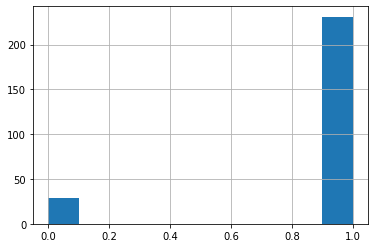

In [15]:
# plot the budget confidence interval using a histogram
dnc['budget'].hist();

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.float64'>
<class 'numpy.int64'>
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

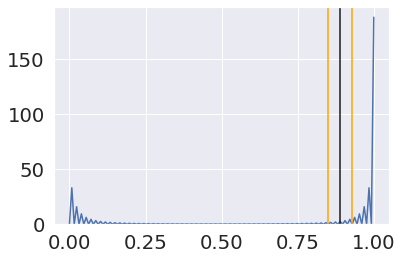

In [57]:
# this doesn't look anything like the coinflips sample,
# because the numbers are floats?

import matplotlib.pyplot as plt

short=np.array(dnc_budget['budget'])
print(short)
print(type(short[1]))
# change array values to integer, does not change graph
short = short.astype('int64') 
print(type(short[1]))
print(short)

# # plot using a seaborn kernal density estimate plot
sns.kdeplot(short)
# CIg= Con_Inv(dnc_budget['budget'])
CIg= Con_Inv(short)
# #mean
plt.axvline(x=CIg[0], color ='k')
# upper and lower confidence interval
plt.axvline(x=CIg[1], color ='orange')
plt.axvline(x=CIg[2], color ='orange');


Chi-squared tests:
Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
By hand using Numpy
In a single line using Scipy

In [27]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
# url = '/Users/austinlasseter/atelier/lambda/dspt4/scraps/pandas_visualization/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [28]:
# find size of chart, 712 passengers
titanic.shape

(712, 6)

In [29]:
titanic['Survivor']= titanic['Survived'].replace({1:'yes',0:'no'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Survivor
0,0,3,male,22.0,7.2500,Southampton,no
1,1,1,female,38.0,71.2833,Cherbourg,yes
2,1,3,female,26.0,7.9250,Southampton,yes
3,1,1,female,35.0,53.1000,Southampton,yes
4,0,3,male,35.0,8.0500,Southampton,no


In [30]:
# how many of each catagory in our columns of interest
print(titanic['Pclass'].value_counts())
titanic['Survivor'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64


no     424
yes    288
Name: Survivor, dtype: int64

In [31]:
# Sort by class
titanic=titanic.sort_values(by = 'Pclass', ascending=True)

# view head and tail to verify
titanic.head



<bound method NDFrame.head of      Survived  Pclass     Sex    Age      Fare     Embarked Survivor
580         1       1  female  29.00  211.3375  Southampton      yes
242         1       1    male   0.92  151.5500  Southampton      yes
243         1       1  female  17.00  108.9000    Cherbourg      yes
245         1       1  female  30.00   56.9292    Cherbourg      yes
246         1       1  female  24.00   83.1583    Cherbourg      yes
..        ...     ...     ...    ...       ...          ...      ...
291         0       3    male  30.00    7.2500  Southampton       no
290         0       3    male  35.00    7.0500  Southampton       no
289         0       3  female  45.00   14.4542    Cherbourg       no
312         1       3    male  21.00    7.7958  Southampton      yes
711         0       3    male  32.00    7.7500   Queenstown       no

[712 rows x 7 columns]>

In [32]:
who_lived=pd.crosstab(titanic['Survivor'],titanic['Pclass'],margins=True)
who_lived.head()

Pclass,1,2,3,All
Survivor,,,,
no,64,90,270,424
yes,120,83,85,288
All,184,173,355,712


In [33]:
# make an array of total deaths per class
dead=who_lived.iloc[0,0:3].values
dead


array([ 64,  90, 270])

In [34]:
live=who_lived.iloc[1,0:3].values
live

array([120,  83,  85])

In [35]:
# those proportions look insane! I want to see more
# all=who_lived.iloc[3,0:3].values
# print(all)

crazy = live/(live+dead)
crazy

array([0.65217391, 0.47976879, 0.23943662])

Oh, bother! Titanic data doesn't fit the idea of sampling at all. Pick another data set.

## Chi-Squared Statistic with Numpy

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}

For the $observed$ values we will just use a version of our contingency table without the margins as a numpy array. In this way, if our observed values array and our expected values array are the same shape, then we can subtract them and divide them directly which makes the calculations a lot cleaner. No for loops!

In [36]:
# load lending club data set
# too big to be used from GitHub
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-25 01:40:42--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 52.26.240.115, 54.71.0.232, 44.232.224.58
Connecting to resources.lendingclub.com (resources.lendingclub.com)|52.26.240.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  22.05M  2.05MB/s    in 12s     

2020-05-25 01:40:55 (1.85 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [37]:
# unzip
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [38]:
# read in dataframe
# it's almost all bold, loaded as header
# funky rows at bottom, too
loans=pd.read_csv('LoanStats_2018Q4.csv', header=1,skipfooter=2)
# loans.head()
loans.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# check size of dataframe
loans.shape

(128412, 144)

In [40]:
# look at some catagorical values to see if they are good options
loans['term'].value_counts()

 36 months    88179
 60 months    40233
Name: term, dtype: int64

In [41]:
loans['emp_length'].value_counts()

10+ years    38826
< 1 year     16036
2 years      10857
3 years      10038
1 year        9067
5 years       7737
4 years       7474
6 years       5422
7 years       4374
8 years       4104
9 years       2773
Name: emp_length, dtype: int64

In [42]:
# these two columns look like they will work, make a new data frame
# to see if length of employment and term of loan are related
myloans= loans[['term','emp_length']].copy()
myloans.shape

(128412, 2)

In [43]:
#remove Nan values 
myloans.dropna(inplace=True)
myloans.shape

(116708, 2)

In [44]:
# sort by # of years employed
# generate new column because <1 and 10+ do not lend themselves to sorting
myloans['num_emp_length'] =myloans['emp_length']
# myloans[['num_emp_length','emp_length']].sample(5)
myloans['num_emp_length'] = myloans['num_emp_length'].map({'< 1 year' : 0,
                                                           '1 year': 1,
                                                           '2 years' : 2,
                                                           '3 years' : 3,
                                                       '4 years' : 4,
                                                       '5 years' : 5,
                                                       '6 years' : 6,
                                                       '7 years' : 7,
                                                       '8 years' : 8,
                                                       '9 years' : 9,
                                                       '10+ years' : 10
                                                       })
myloans[['num_emp_length','emp_length']].head


<bound method NDFrame.head of         num_emp_length emp_length
0                    2    2 years
1                    2    2 years
2                   10  10+ years
3                   10  10+ years
4                    1     1 year
...                ...        ...
128405               3    3 years
128407              10  10+ years
128408               5    5 years
128409              10  10+ years
128411               2    2 years

[116708 rows x 2 columns]>

In [45]:
# sort by years employed
myloans.sort_values(by=['num_emp_length'], inplace=True, ascending=True)
myloans.head()
# myloans.tail()

,term,emp_length,num_emp_length
82242,36 months,< 1 year,0
58750,36 months,< 1 year,0
93117,36 months,< 1 year,0
58769,36 months,< 1 year,0
27265,60 months,< 1 year,0


In [46]:
#perform crosstab to look at value totals 
mynums=pd.crosstab(myloans['term'],myloans['num_emp_length'],margins=True)
mynums

num_emp_length,0,1,2,3,4,5,6,7,8,9,10,All
term,,,,,,,,,,,,
36 months,11722,6506,7694,7005,5192,5295,3687,2929,2699,1841,24880,79450
60 months,4314,2561,3163,3033,2282,2442,1735,1445,1405,932,13946,37258
All,16036,9067,10857,10038,7474,7737,5422,4374,4104,2773,38826,116708


In [47]:
#counts 3 year loan
year_3=mynums.iloc[0,0:11].values
year_3

array([11722,  6506,  7694,  7005,  5192,  5295,  3687,  2929,  2699,
        1841, 24880])

In [48]:
#counts for length of loan
year_5=mynums.iloc[1,0:11].values
year_5

array([ 4314,  2561,  3163,  3033,  2282,  2442,  1735,  1445,  1405,
         932, 13946])

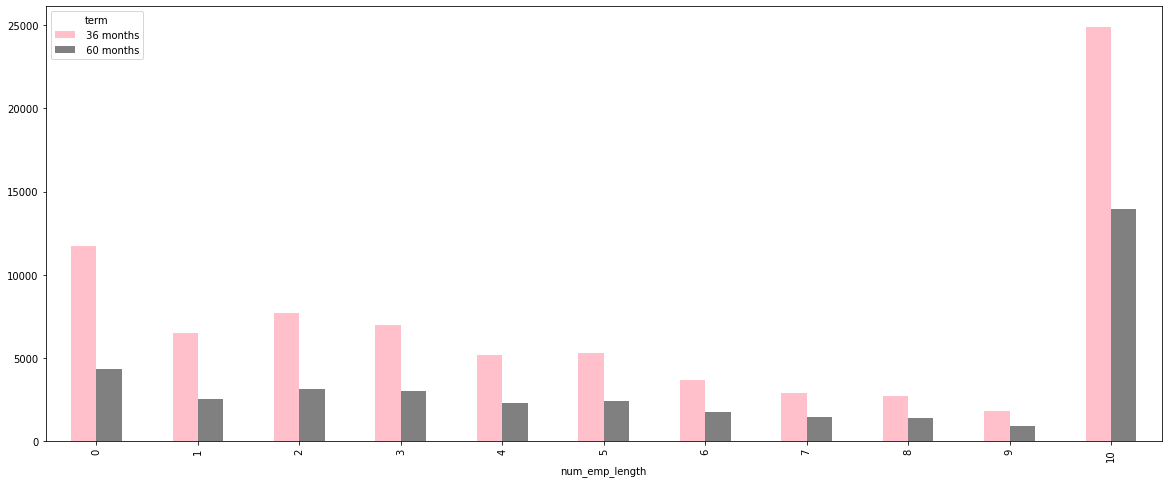

In [49]:
#make the table graphable by removing all
mynums2=pd.crosstab(myloans['term'],myloans['num_emp_length'],margins=False)

mynums2.T.plot(kind='bar',color=['pink','gray'], figsize=(20,8));

In [0]:
#perform crosstab to look at value totals 
mynums=pd.crosstab(myloans['term'],myloans['num_emp_length'],margins=True)
mynums

num_emp_length,0,1,2,3,4,5,6,7,8,9,10,All
term,,,,,,,,,,,,
36 months,11722,6506,7694,7005,5192,5295,3687,2929,2699,1841,24880,79450
60 months,4314,2561,3163,3033,2282,2442,1735,1445,1405,932,13946,37258
All,16036,9067,10857,10038,7474,7737,5422,4374,4104,2773,38826,116708


In [55]:
# extract expected value calculation parts from table
row_total = mynums.iloc[0:2,-1].values
row_total

array([79450, 37258])

In [58]:
column_total = mynums.iloc[-1,0:11].values
column_total

array([16036,  9067, 10857, 10038,  7474,  7737,  5422,  4374,  4104,
        2773, 38826])

## Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{(row_{i} \text{total})(column_{j} \text{total}) }{(\text{total observations})}  
\end{align}

In [60]:
mynums_total = mynums.iloc[-1,-1]
mynums_total

116708

In [68]:
# calculate expected value, and turn it into an array
expected = []
for i in range(len(row_total)):
  e_row =[]
  for column in column_total:
    e_val=column*row_total[i]/mynums_total
    e_row.append(e_val)
  expected.append(e_row)

expected = np.array(expected)
print(expected)

[[10916.64838743  6172.44019262  7390.99847483  6833.4570038
   5087.99139733  5267.03096617  3691.0743051   2977.63906502
   2793.83418446  1887.7441992  26431.14182404]
 [ 5119.35161257  2894.55980738  3466.00152517  3204.5429962
   2386.00860267  2469.96903383  1730.9256949   1396.36093498
   1310.16581554   885.2558008  12394.85817596]]


In [69]:
# the expected data frame should be the same as the observed data frame, which
# is mynums2, which does not have the margins 
print(mynums2.shape)
print(expected.shape)

(2, 11)
(2, 11)


## Chi-Squared Statistic

\begin{align}
\chi^2 = \sum \frac{(observed_{i}-expected_{i})^2}{(expected_{i})}
\end{align}


In [80]:
# turn mynums2 into an array
observed= np.array(mynums2)
print(observed)


[[11722  6506  7694  7005  5192  5295  3687  2929  2699  1841 24880]
 [ 4314  2561  3163  3033  2282  2442  1735  1445  1405   932 13946]]


In [81]:
# calculate chi squared
chi_square = (((observed-expected)**2)/expected).sum()
print (chi_square)

603.4546565301239


Now calculate chi squared it simply with spicy

In [83]:
# get parameters from above information
# degrees of freedom
dof=((len(row_total)-1)*(len(column_total)-1))
dof

10

In [0]:
from scipy import stats


In [86]:
stats.chisquare(observed, expected, dof)

Power_divergenceResult(statistic=array([1.86107053e+02, 5.64639981e+01, 3.89105711e+01, 1.34892128e+01,
       6.65998488e+00, 4.65232606e-01, 1.40875476e-02, 2.48873967e+00,
       1.00834765e+01, 3.62571273e+00, 2.85146588e+02]), pvalue=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]))

In [89]:
# I have no understanding of why this line of code can be 
# input this way and how it works, too tired to investigate

chi_square, p_value, dof, expected = stats.chi2_contingency(observed)

print('chi squared ', chi_square)
print('p_value ', p_value)
print('degrees of freedom ', dof)
print('expected ', expected)


chi squared  603.4546565301239
p_value  3.202654750869701e-123
degrees of freedom  10
expected  [[10916.64838743  6172.44019262  7390.99847483  6833.4570038
   5087.99139733  5267.03096617  3691.0743051   2977.63906502
   2793.83418446  1887.7441992  26431.14182404]
 [ 5119.35161257  2894.55980738  3466.00152517  3204.5429962
   2386.00860267  2469.96903383  1730.9256949   1396.36093498
   1310.16581554   885.2558008  12394.85817596]]


Null Hypothesis: The length of a consumer loan is independent of years of employment.

The null hypothesis is rejected, there is a correlation between years of employment and the length of loan.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)